In [1]:
import numpy as np
import lbg_forecast.dust_priors as dpr
import lbg_forecast.sfh as sfh
import lbg_forecast.population_model as pop
import matplotlib.pyplot as plt

import lbg_forecast.priors_gp_dust as gpdp
dust_prior = gpdp.DustPrior('./')

Loading Models
Loading Complete


[0.3525552  0.3303906  0.2848055  0.30372622 0.28030095 0.27015153
 0.28458481 0.25453604 0.26708903 0.25719125 0.25777896 0.25228435
 0.24453756 0.23861239 0.2364851  0.23113633 0.22755392 0.22924914
 0.25684478 0.30193762 0.36305956 0.43615513 0.51675541 0.60554151
 0.7061579  0.80865258 0.91732408 1.05337339 1.09640069] [0.69503826 0.67649411 0.66633842 0.64850108 0.64170189 0.6293188
 0.62134659 0.60792224 0.60806177 0.65301791 0.78707208 0.94887988
 1.13461527 1.24198839]


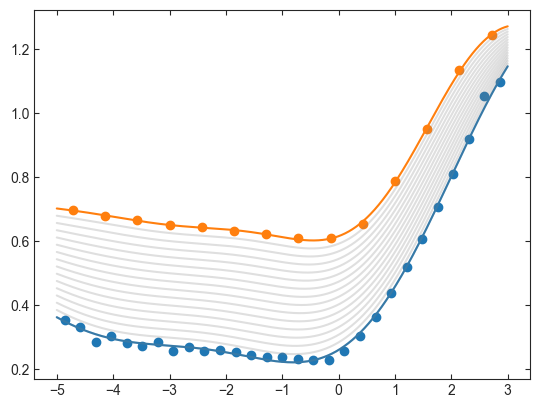

In [7]:
recent_sfrs, dust2, dust_index, dust1 = dust_prior.get_pop_cosmos_samples(1000000)
n, tau, tau1, ne, taue, tau1e, sfr = dust_prior.get_nagaraj22_samples()

d2xpop, d2ypop, d2yerrpop = gpdp.process_samples(recent_sfrs, dust2, -5, 3, 30)
plt.scatter(d2xpop, d2ypop)
plt.plot(dust_prior.dust2_grid, dust_prior.dust2_mean())

d2xnag, d2ynag, d2errnag = gpdp.process_samples(sfr, tau, -5, 3, 15)
plt.scatter(d2xnag, d2ynag)
plt.plot(dust_prior.dust2_grid, dust_prior.dust2_mean_nagaraj())

nplots = 15
for f in range(nplots):
    plt.plot(dust_prior.dust2_grid, dust_prior.interpolate_models(f/nplots), alpha=0.25, color='grey')

print(d2ypop, d2ynag)



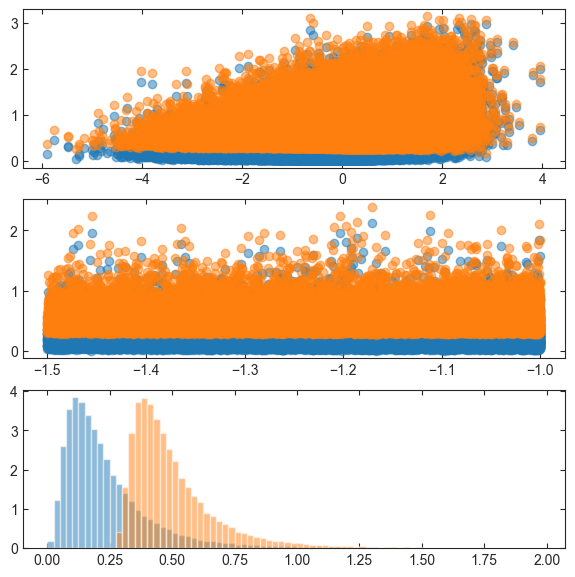

In [11]:
recent_sfrs, dust2, dust_index, dust1 = dust_prior.get_pop_cosmos_samples(1000000)

new_sfrs = recent_sfrs#np.random.uniform(-4, 3, 100000)
dust2_gp, dust_index_gp, dust1_gp = dust_prior.sample_dust_model(new_sfrs)

f, ax = plt.subplots(3, 1, figsize=(7, 7))
ax[0].scatter(recent_sfrs, dust2, alpha=0.5)
ax[0].scatter(new_sfrs, dust2_gp, alpha=0.5)

sfr_point = -1
inds0 = np.where((recent_sfrs<sfr_point)&(recent_sfrs>sfr_point-0.5))[0]
inds = np.where((new_sfrs<sfr_point)&(new_sfrs>sfr_point-0.5))[0]
ax[1].scatter(recent_sfrs[inds0], dust2[inds0], alpha=0.5)
ax[1].scatter(new_sfrs[inds], dust2_gp[inds], alpha=0.5)

bins = np.arange(0, 2, 0.025)
histogram = ax[2].hist(dust2[inds0], density=True, bins=bins, alpha=0.5)
histogram = ax[2].hist(dust2_gp[inds], density=True, bins=bins, alpha=0.5)

Loading Models
Loading Complete


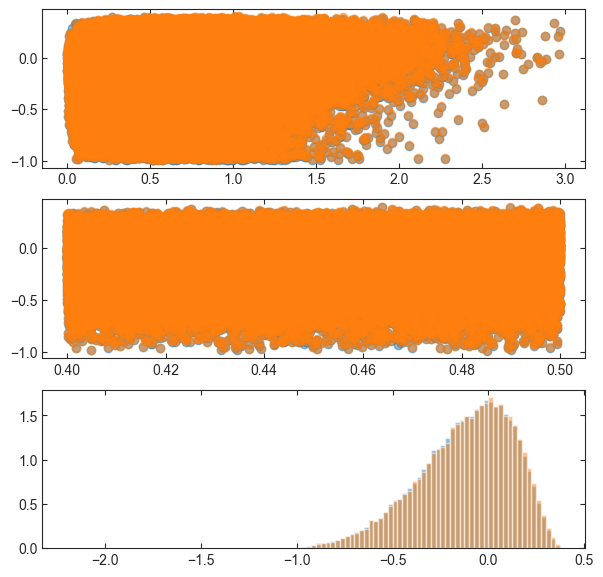

In [5]:
recent_sfrs, dust2, dust_index, dust1 = dust_prior.get_pop_cosmos_samples(1000000)

dust_prior = gpdp.DustPrior('./')
#dust2_gp, dust_index_gp, dust1_gp = dust_prior.sample_dust_model(recent_sfrs)
dust2_gp = dust2#np.random.uniform(0, 4, 500000)
dust_index_gp = dust_prior.sample_dust_index(dust2_gp)

f, ax = plt.subplots(3, 1, figsize=(7, 7))
ax[0].scatter(dust2, dust_index, alpha=0.5)
ax[0].scatter(dust2_gp, dust_index_gp, alpha=0.5)

dust2_point = 0.5
inds0 = np.where((dust2<dust2_point)&(dust2>dust2_point-0.1))[0]
inds = np.where((dust2_gp<dust2_point)&(dust2_gp>dust2_point-0.1))[0]

ax[1].scatter(dust2[inds0], dust_index[inds0], alpha=0.5)
ax[1].scatter(dust2_gp[inds], dust_index_gp[inds], alpha=0.5)

bins = np.arange(-2.2, 0.4, 0.025)
histogram = ax[2].hist(dust_index[inds0], density=True, bins=bins, alpha=0.5)
histogram = ax[2].hist(dust_index_gp[inds], density=True, bins=bins, alpha=0.5)

Loading Models
Loading Complete


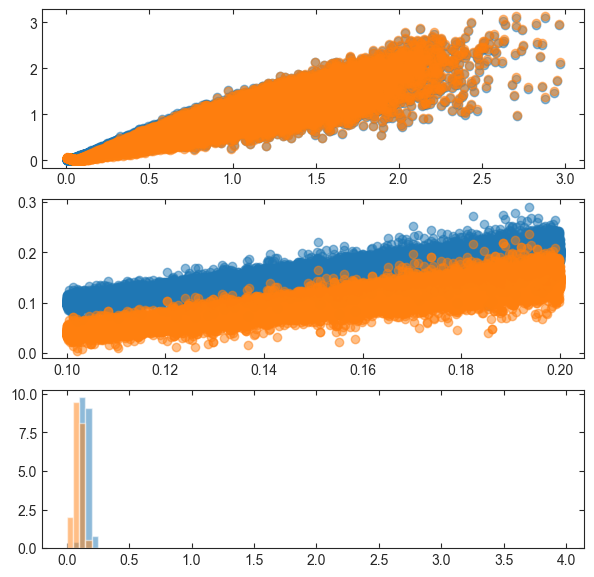

In [6]:
recent_sfrs, dust2, dust_index, dust1 = dust_prior.get_pop_cosmos_samples(1000000)

dust_prior = gpdp.DustPrior('./')
#dust2_gp, dust_index_gp, dust1_gp = dust_prior.sample_dust_model(recent_sfrs)
dust2_gp = dust2#np.random.uniform(0, 4, 500000)
dust1_gp = dust_prior.sample_dust1(dust2_gp)

f, ax = plt.subplots(3, 1, figsize=(7, 7))
ax[0].scatter(dust2, dust1, alpha=0.5)
ax[0].scatter(dust2_gp, dust1_gp, alpha=0.5)

dust2_point = 0.2
inds0 = np.where((dust2<dust2_point)&(dust2>dust2_point-0.1))[0]
inds = np.where((dust2_gp<dust2_point)&(dust2_gp>dust2_point-0.1))[0]

ax[1].scatter(dust2[inds0], dust1[inds0], alpha=0.5)
ax[1].scatter(dust2_gp[inds], dust1_gp[inds], alpha=0.5)

bins = np.arange(0.0, 4.0, 0.05)
histogram = ax[2].hist(dust1[inds0], density=True, bins=bins, alpha=0.5)
histogram = ax[2].hist(dust1_gp[inds], density=True, bins=bins, alpha=0.5)

In [5]:
spsp = np.load("sps_parameter_samples/sps_test.npy")
photometry = np.load("photo_samples/photo_test.npy")
nzs = np.load("nz_samples/nz_test.npy", allow_pickle=True)

print(spsp.shape, nzs)

(4, 10000, 17) [[array([0.11018772, 2.96959821, 2.89129891, 2.52377267, 2.76903624,
         3.10426427, 2.83934323, 2.47397748, 2.95146691, 2.70368374,
         2.82376165, 2.56702969, 2.93015392, 2.56702969])
  array([0.42982684, 2.99609923, 3.519115  , 3.46199565])
  array([], dtype=float64)]
 [array([2.09526436, 2.74414193, 2.99791319, 2.70519856])
  array([3.50186096, 0.48242002, 3.30264661, 0.41179573, 3.83345313,
         3.96616508, 3.45733103])
  array([], dtype=float64)]
 [array([3.33854274, 2.59455302, 3.04108499, 3.3514493 , 3.65868281,
         3.40765669, 2.75841839])
  array([3.64473614, 3.64473614, 3.64473614, 3.64473614, 4.25453254,
         4.24550707, 3.88565015, 3.65868281, 4.06197001, 0.41196671,
         3.64265298, 4.04816809, 3.90216095, 4.02754984, 3.76791094,
         3.73050088, 3.58090133, 3.71281482, 3.71281482, 3.78516485])
  array([], dtype=float64)]
 [array([0.12371225, 2.77272859, 2.69654579, 0.04340397, 2.58707018])
  array([0.6065422 , 0.46848064, 0.2

(4, 10000, 17)


(-5.0, 3.0)

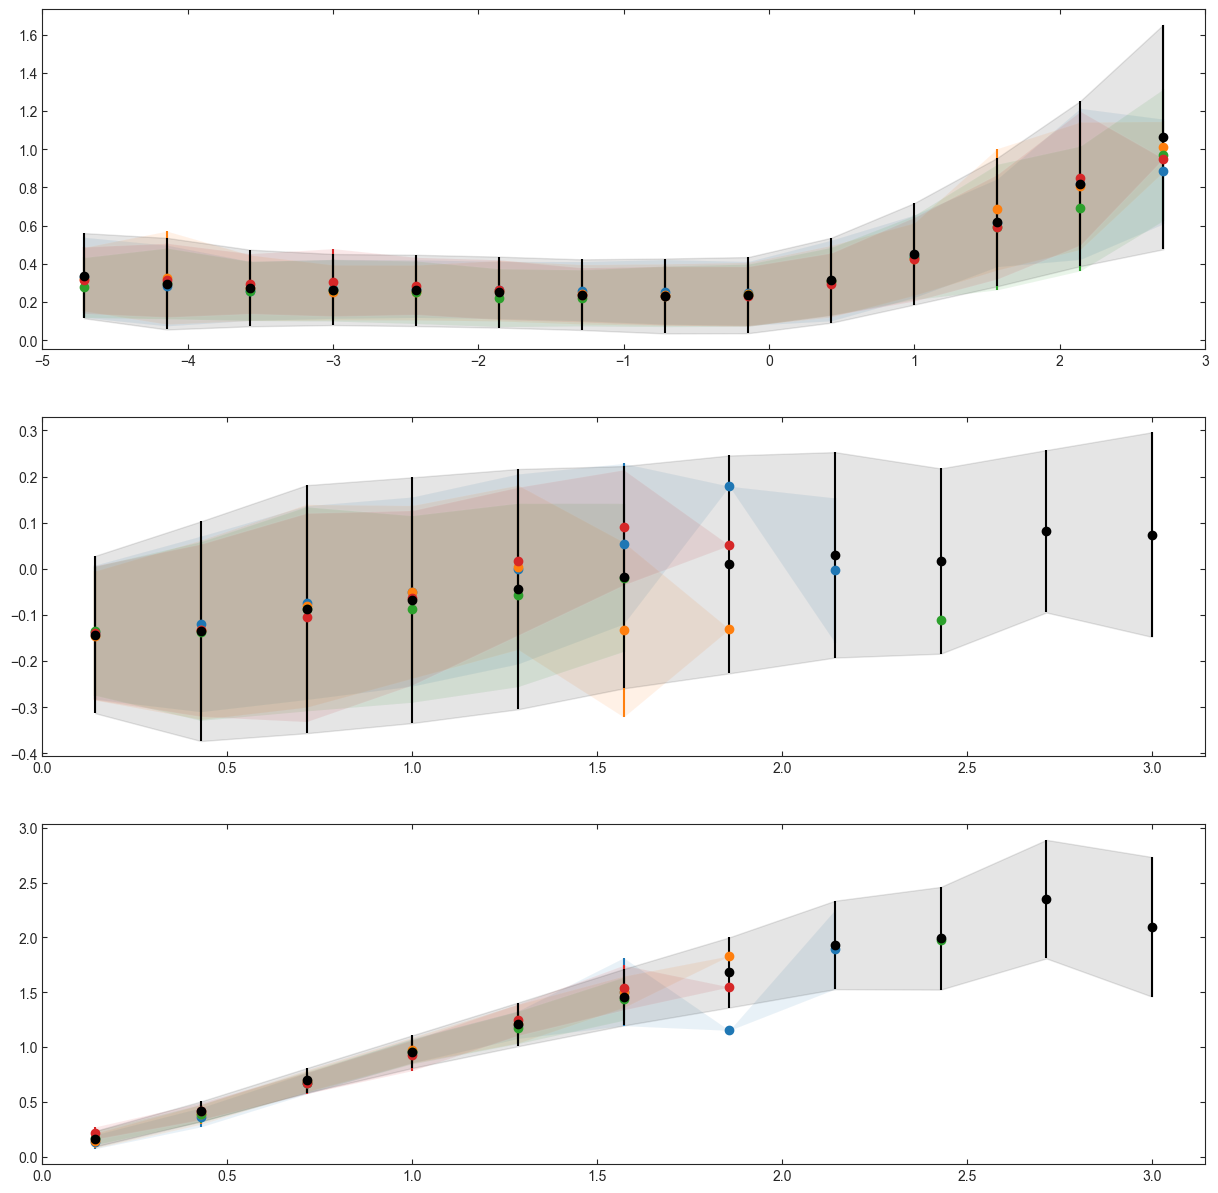

In [16]:
print(spsp.shape)
f, ax = plt.subplots(3, 1, figsize=(15, 15))
recent_sfrs_pop, dust2_pop, dust_index_pop, dust1_pop = dust_prior.get_pop_cosmos_samples(1000000)

for i in range(spsp.shape[0]):

    sps_real = spsp[i]
    redshifts = sps_real[:, 0]
    logmasses = sps_real[:, -1]
    logsfrratios = sps_real[:, 10:-1]
    dust = sps_real[:, 2:5]
    dust1 = dust[:, 0]
    dust_index = dust[:, 2]
    dust2 = dust[:, 1]
    recent_sfrs = np.log10(sfh.calculate_recent_sfr(redshifts, logmasses, logsfrratios))

    d2x, d2y, d2yerr = gpdp.process_samples(recent_sfrs, dust2, -5, 3)
    ax[0].errorbar(d2x, d2y, d2yerr, fmt='o')
    ax[0].fill_between(d2x, d2y-d2yerr, d2y+d2yerr, alpha=0.1)

    dix, diy, diyerr = gpdp.process_samples(dust2, dust_index, 0, 4)
    ax[1].errorbar(dix, diy, diyerr, fmt='o')
    ax[1].fill_between(dix, diy-diyerr, diy+diyerr, alpha=0.1)

    d1x, d1y, d1yerr = gpdp.process_samples(dust2, dust1, 0, 4)
    ax[2].errorbar(d1x, d1y, d1yerr, fmt='o')
    ax[2].fill_between(d1x, d1y-d1yerr, d1y+d1yerr, alpha=0.1)

d2x, d2y, d2yerr = gpdp.process_samples(recent_sfrs_pop, dust2_pop, -5, 3)
ax[0].errorbar(d2x, d2y, d2yerr, fmt='ko')
ax[0].fill_between(d2x, d2y-d2yerr, d2y+d2yerr, alpha=0.1, color='k')

dix, diy, diyerr = gpdp.process_samples(dust2_pop, dust_index_pop, 0, 4)
ax[1].errorbar(dix, diy, diyerr, fmt='ko')
ax[1].fill_between(dix, diy-diyerr, diy+diyerr, alpha=0.1, color='k')

d1x, d1y, d1yerr = gpdp.process_samples(dust2_pop, dust1_pop, 0, 4)
ax[2].errorbar(d1x, d1y, d1yerr, fmt='ko')
ax[2].fill_between(d1x, d1y-d1yerr, d1y+d1yerr, alpha=0.1, color='k')

ax[0].set_xlim(-5, 3)


(4, 10000, 17)


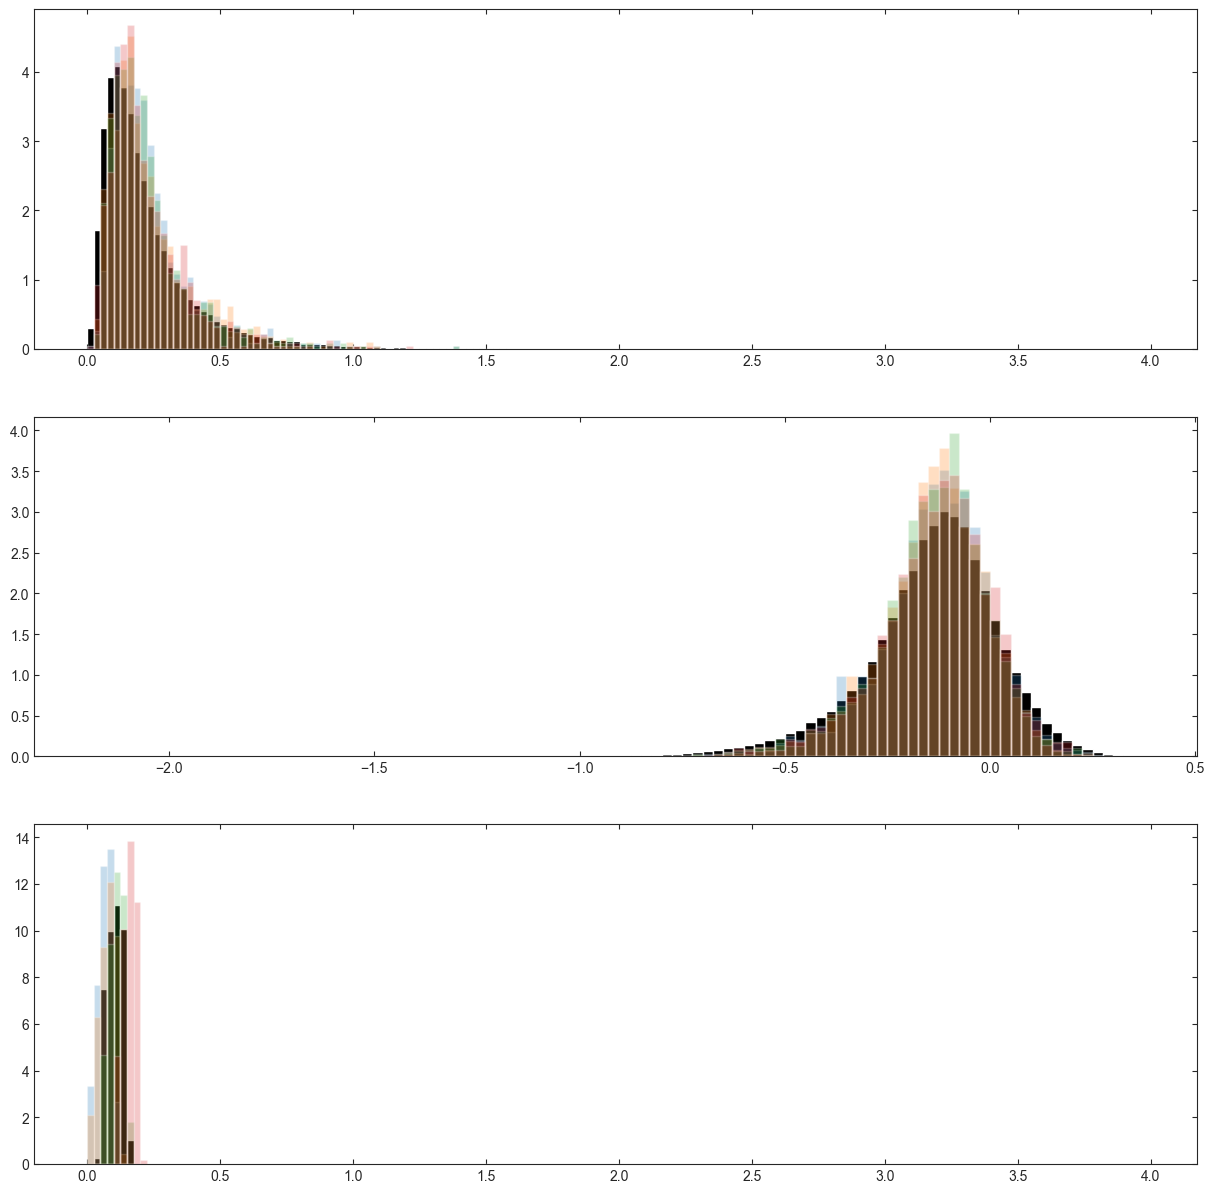

In [30]:
print(spsp.shape)
f, ax = plt.subplots(3, 1, figsize=(15, 15))
recent_sfrs_pop, dust2_pop, dust_index_pop, dust1_pop = dust_prior.get_pop_cosmos_samples(1000000)

sfr_point = 0
d2_point = 1.0
d2_point2 = 0.15
dsfr = 0.5
dd2 = 0.1
dd22 = 0.1
d2_bins = np.arange(0.0, 4.0, 0.025)
dibins = np.arange(-2.2, 0.4, 0.025)

for i in range(spsp.shape[0]):

    sps_real = spsp[i]
    redshifts = sps_real[:, 0]
    logmasses = sps_real[:, -1]
    logsfrratios = sps_real[:, 10:-1]
    dust = sps_real[:, 2:5]
    dust1 = dust[:, 0]
    dust_index = dust[:, 2]
    dust2 = dust[:, 1]
    recent_sfrs = np.log10(sfh.calculate_recent_sfr(redshifts, logmasses, logsfrratios))
    
    inds = np.where((recent_sfrs<sfr_point)&(recent_sfrs>sfr_point-dsfr))[0]
    histogram = ax[0].hist(dust2[inds], density=True, bins=d2_bins, alpha=0.25)

    inds = np.where((dust2<dust2_point)&(dust2>dust2_point-dd2))[0]
    histogram = ax[1].hist(dust_index[inds], density=True, bins=dibins, alpha=0.25)

    inds = np.where((dust2<d2_point2)&(dust2>d2_point2-dd22))[0]
    histogram = ax[2].hist(dust1[inds], density=True, bins=d2_bins, alpha=0.25)

inds0 = np.where((recent_sfrs_pop<sfr_point)&(recent_sfrs_pop>sfr_point-dsfr))[0]
histogram = ax[0].hist(dust2_pop[inds0], density=True, bins=d2_bins, color='k', zorder=-1)

inds0 = np.where((dust2_pop<dust2_point)&(dust2_pop>dust2_point-dd2))[0]
histogram = ax[1].hist(dust_index_pop[inds0], density=True, bins=dibins, color='k', zorder=-1)

inds0 = np.where((dust2_pop<d2_point2)&(dust2_pop>d2_point2-dd22))[0]
histogram = ax[2].hist(dust1_pop[inds0], density=True, bins=d2_bins, color='k', zorder=-1)

In [7]:
#np.save("dust_data/popcosmos_recentsfrs.npy", dust_prior.recent_sfrs)
#nagaraj22 = np.array([dust_prior.n, dust_prior.tau, dust_prior.tau1, dust_prior.ne, dust_prior.taue, dust_prior.tau1e, dust_prior.sfr])
#np.save("dust_data/saved_nagaraj22samples.npy", nagaraj22)

dust_prior = gpdp.DustPrior('.')

f, ax = plt.subplots(1, 3, figsize=(15, 5))

ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]

test_sfr = np.linspace(-5, 3, 500)
dust2 = dust_prior.sample_dust2(test_sfr)
dust_index = dust_prior.sample_dust_index(dust2)
dust1 = dust_prior.sample_dust1(dust2)

ax1.scatter(test_sfr, dust2)
ax2.scatter(dust2, dust_index)
ax3.scatter(dust2, dust1)

## DONT DELETE

from duste.DustAttnCalc import DustAttnCalc
ngal = 2000

logM = np.random.uniform(8.74,11.30,ngal)
sfr = np.random.uniform(-5,2.5,ngal)
logZ = np.random.uniform(-1.70,0.18,ngal)
z=np.random.uniform(0.51,2.83,ngal)
i=np.random.uniform(0.09,0.97,ngal)
dobj = DustAttnCalc(sfr=sfr, logM=logM, logZ=logZ, z=z, i=i, bv=True, eff=False)
dac, dac1, n, tau, tau1, ne, taue, tau1e = dobj.calcDust(max_num_plot=0)

plt.scatter(sfr, tau)